# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; NITISH MAINDOLIYA/p>
# <p style="text-align: right;"> &#9989; ze-ntsh</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression
* Creating a project timeline

**This assignment is due by 11:59 pm on Friday, April 4th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s25-turnin` repository you created so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

```bash
git clone https://github.com/ze-ntsh/cmse202-s25-turnin.git
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


In [189]:
### Points breakdown -- 1 pt for command to clone repo
###                     2 pts for setting up branch, etc.
###                     3 pts for Git commits/Pushes throughout homework.

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog
import requests
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

---
# Part 2: Loading the datasets (10 points)

In Parts 2, you will be working with the California Cooperative Oceanic Fisheries Investigations oceanographic and larval fish dataset that is available at https://www.kaggle.com/datasets/sohier/calcofi?resource=download. 

To get started on Part 2, **you'll need to download the following file**:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above CSV file in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

``` bash
# Put the (two) commands you used to download the two files here.
# There is only one curl command needed to download the file in this case. Kaggle files can't be downloaded directly using curl
curl -O https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv
```

&#9989;  **Question 2.2 (2 points)**: Next, load the data using Pandas and display the first 20 rows

In [191]:
# Put your code here
oceanographic_data = pd.read_csv('Book1.csv')
oceanographic_data.head(20)

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
5,10.45,33.431
6,10.45,33.440
7,10.24,33.424
8,10.06,33.420
9,9.86,33.494


&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [192]:
initial_length = len(oceanographic_data)
oceanographic_data = oceanographic_data.dropna()
remaining_length = len(oceanographic_data)

print(f"Rows dropped: {initial_length - remaining_length}")
print(f"Percentage of rows dropped: {(initial_length - remaining_length) / initial_length * 100:.2f}")

Rows dropped: 50616
Percentage of rows dropped: 5.85


&#9989;  **Question 2.4 (2 points)**: How many rows did you end up dropping from this data set? What total percentage of data was removed?

50616 rows were dropped from the original dataset. The percentage of data removed was 5.85%

&#9989;  **Question 2.5 (2 points)**: Look at the website in which this dataset is hosted on Kaggle. What do the columns `Salnty` and `T_degC` represent?

- T_degC: Water temperature in degree Celsius
- Salnty: Salinity in g of salt per kg of water (g/kg)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear and Polynomial Regression (28 points)

In this part, we'll perform some one-variable linear and polynomial regression analysis on the California Cooperative Oceanic Fisheries Investigations oceanographic and larval fish data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `Salnty` using the `T_degC` and **display the results summaries**. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

In [193]:
# Put your code here
ocean_fit_result = sm.OLS(oceanographic_data['Salnty'], sm.add_constant(oceanographic_data['T_degC'])).fit()
ocean_fit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salnty   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                 2.791e+05
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:32:56   Log-Likelihood:            -4.0596e+05
No. Observations:              814247   AIC:                         8.119e+05
Df Residuals:                  814245   BIC:                         8.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4409      0.001   2.83e+04      0.000      34.439      34.443
T_degC        -0.0552      0.000   -528.330      0.000      -0.055      -0.055
==============================================================================
Omnibus:                   173454.795   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1059198.318
Skew:                           0.888   Prob(JB):                         0.00
Kurtosis:                       8.297   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 3.2 (4 points)**: Answer the following questions: 

1. What is the R-squared value you got? 

2. Based on your R-squared value, what does it tell you about the regression fit, and how the model fits the data?

1. The R-squared value I got was 0.255
2. The R-squared value of 0.255 indicates that approximately 25.5% of the variance in the dependent variable (Salnty) can be explained by the independent variable (T_degC). This suggests that the linear regression model does not fit the data very well, as a significant portion of the variance remains unexplained. A higher R-squared value would indicate a better fit.

&#9989;  **Question 3.3 (6 points)**: Now make a scatter plot of `T_degC` (x-axis) vs. `Salnty` (on y-axis). Plot the best fit line on the same plot. Label the axes, and add a legend, and give the plot a title.

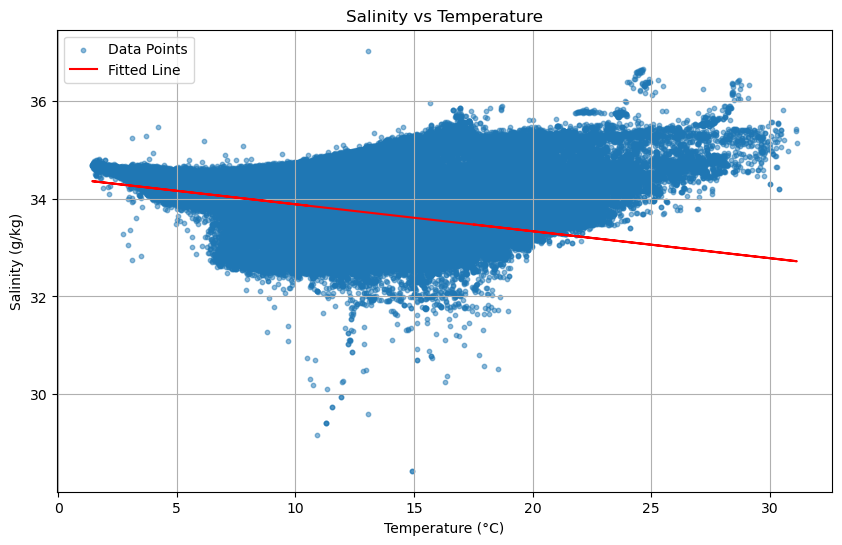

In [194]:
# Put your code here
plt.figure(figsize=(10, 6))
plt.scatter(oceanographic_data['T_degC'], oceanographic_data['Salnty'], alpha=0.5, label='Data Points', s=10)
plt.plot(oceanographic_data['T_degC'], ocean_fit_result.predict(sm.add_constant(oceanographic_data['T_degC'])), color='red', label='Fitted Line')
plt.title('Salinity vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity (g/kg)')
plt.legend()
plt.grid(True)
plt.show()

&#9989;  **Question 3.4 (2 points)**: What is the slope and intercept of your fit line?

In [195]:
# Slope and Intercept
slope = ocean_fit_result.params['T_degC']
intercept = ocean_fit_result.params['const']
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

Slope: -0.0552
Intercept: 34.4409


**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fit. Make sure to create a large enough figure so that everything is easily visible. 

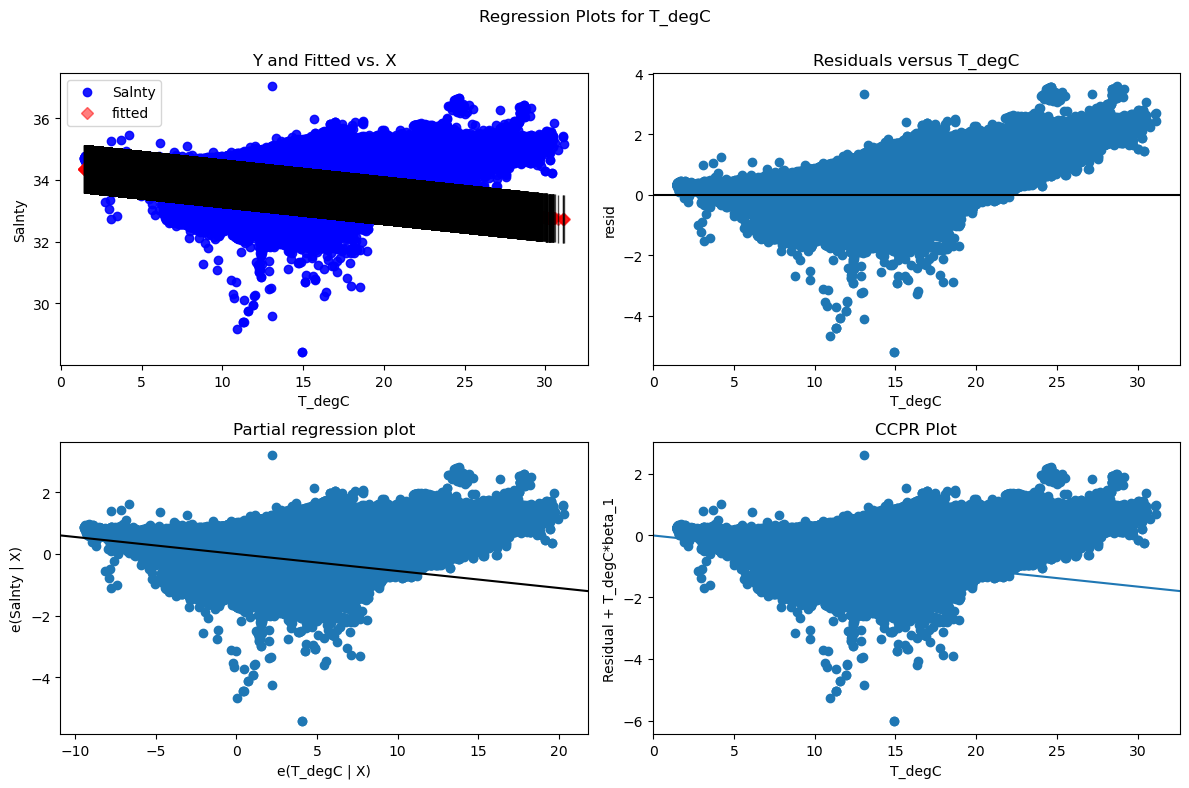

In [196]:
# Put code here.
fig = plt.figure(figsize=(12, 8))
plot_regress_exog(ocean_fit_result, 'T_degC', fig=fig)
plt.show()

&#9989;  **Question 3.6 (6 points)**: Now use some online resource to help you make sense of this residual plot. Is there heteroscedastisity? Is there constant variance? Does it show signs of non-linearity? These are a few questions you might ask yourself or try to figure out in making sense of the residual plot. 

- Yes, there is heteroscedasticity present in the residual plot. The spread of the residuals is erratic, which indicates that the variance of the residuals is not constant across all levels of the fitted values. This suggests that a linear model may not be appropriate for this data and that a polynomial or other non-linear model may be a better fit. Additionally, there are some patterns in the residuals which indicate non-linearity.

Answer: It looks biased and heteroscedastic. aka it is not what we want to see in a residual plot for a model.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (24 points)

In this part, we'll use multiple features to do predictions. https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

First, download and read in this synthetic dataset of Student Performance. `https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Student_Performance.csv`

&#9989;  **Question 4.1 (5 points)**: Display the data types of the data you have just read in. We want all of our data types to be integers or floats. Modify the `Extracurricular Activities` column so that a YES is now a 1 and a NO is now a 0. 

In [197]:
# Put your code here
student_performance_data = pd.read_csv('Student_Performance.csv')
print(student_performance_data.dtypes)

# Drop rows with missing values
student_performance_data = student_performance_data.dropna()

# Change extracurricular to binary values (1 for yes, 0 for no)
student_performance_data['Extracurricular Activities'] = student_performance_data['Extracurricular Activities'].map({'Yes': 1, 'No': 0, 1: 1, 0: 0})

student_performance_data.head()

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


&#9989;  **Question 4.2 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `Performance Index` based on `Hours Studied`, `Previous Scores`,`Extracurricular Activities`, `Sample Question Papers Practiced` and `Sleep Hours`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit these models and display the summary of results.  For now only use three columns of data as independent variables.You can. choose which columns to use in your model. We will add all of the other columns later.

In [198]:
# Put your code here
sp_ols3_result = sm.OLS(student_performance_data['Performance Index'],
                       sm.add_constant(student_performance_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities']])).fit()
sp_ols3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.365e+05
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:33:36   Log-Likelihood:                -22362.
No. Observations:               10000   AIC:                         4.473e+04
Df Residuals:                    9996   BIC:                         4.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -30.0962      0.106   -284.295      0.000     -30.304     -29.889
Hours Studied                  2.8572      0.009    326.606      0.000       2.840       2.874
Previous Scores                1.0190      0.001    780.160      0.000       1.016       1.022
Extracurricular Activities     0.5893      0.045     13.008      0.000       0.500       0.678
==============================================================================
Omnibus:                        4.810   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                5.066
Skew:                           0.020   Prob(JB):                       0.0794
Kurtosis:                       3.103   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.3 (4 points)**: Answer the following questions: 

1. What is your R-squared value? 

2. Is your multiple regression model a good fit? why or why not?

1. The R-squared value I got was 0.986
2. The multiple regression model appears to be a good fit as the R-squared value of 0.986 indicates that approximately 98.6% of the variance in the dependent variable (Performance Index) can be explained by the independent variables (Hours Studied, Previous Scores, Extracurricular Activities). This suggests that the model is able to capture most of the variability in the data and therefore provides a good fit.

&#9989;  **Question 4.4 (2 points)**: Perform the multivariable linear regression again, but this time with all the features/columns. Display the summary of these results.

In [199]:
# Put your code here
sp_ols_all_result = sm.OLS(student_performance_data['Performance Index'],
                        sm.add_constant(student_performance_data.drop(columns=['Performance Index']))).fit()
sp_ols_all_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:33:36   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours Studied                        2.8530      0.008    362.353      0.000       2.838       2.868
Previous Scores                      1.0184      0.001    866.450      0.000       1.016       1.021
Extracurricular Activities           0.6129      0.041     15.029      0.000       0.533       0.693
Sleep Hours                          0.4806      0.012     39.972      0.000       0.457       0.504
Sample Question Papers Practiced     0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.5 (2 points)**: How much better/worse is the full model compared to the original model you made? What are its advantages? Briefly discuss the answer.

1. The R-squared value I now got is 0.989, which is slightly better than the previous model's R-squared value of 0.986. This indicates that the full model explains a slightly higher percentage of the variance in the dependent variable (Performance Index).
2. The advantage of using the full model is that it incorporates all available features, which allows for a more comprehensive understanding of the factors that influence the performance index. By including all relevant variables, the model can capture more complex relationships and interactions between the independent variables and the dependent variable, leading to improved predictive accuracy. However, it is important to ensure that the additional variables are not introducing multicollinearity or overfitting the model.

&#9989;  **Question 4.6 (3 points)**: Create five `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your model. Pay attention to the top two plots: the fitted values figure and the residual plot. 

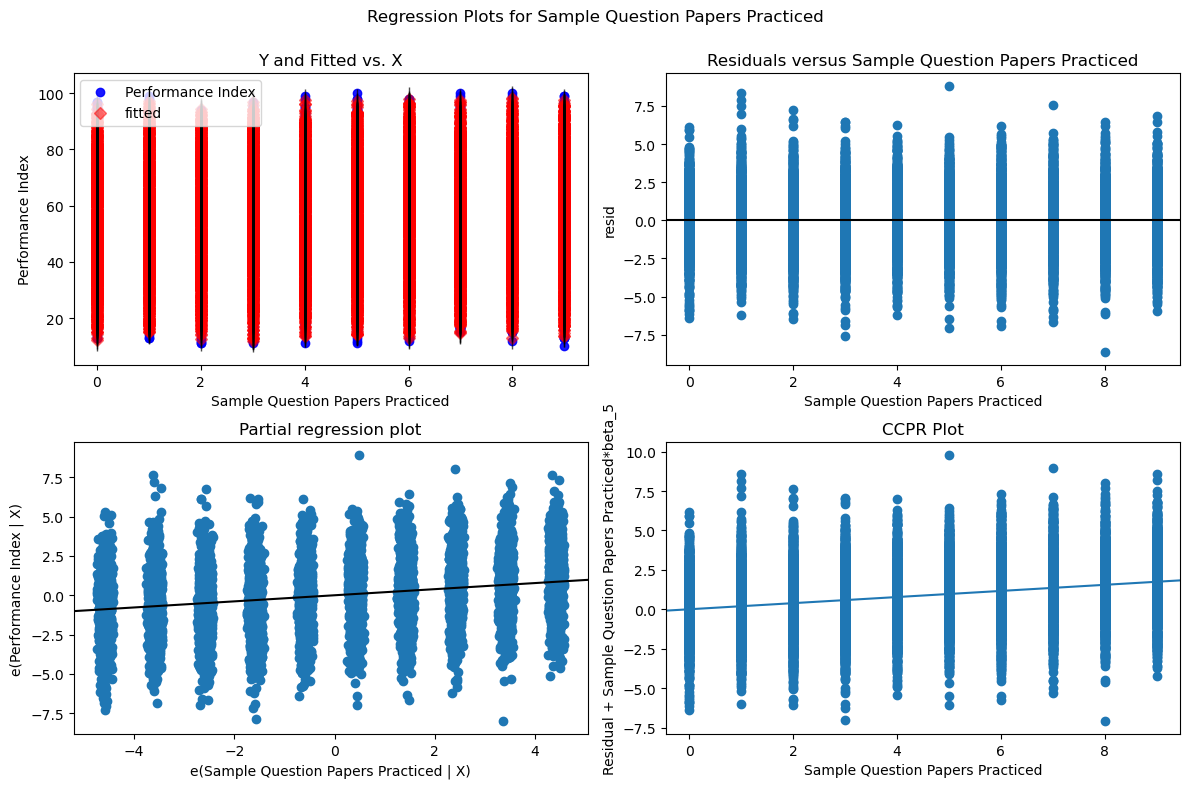

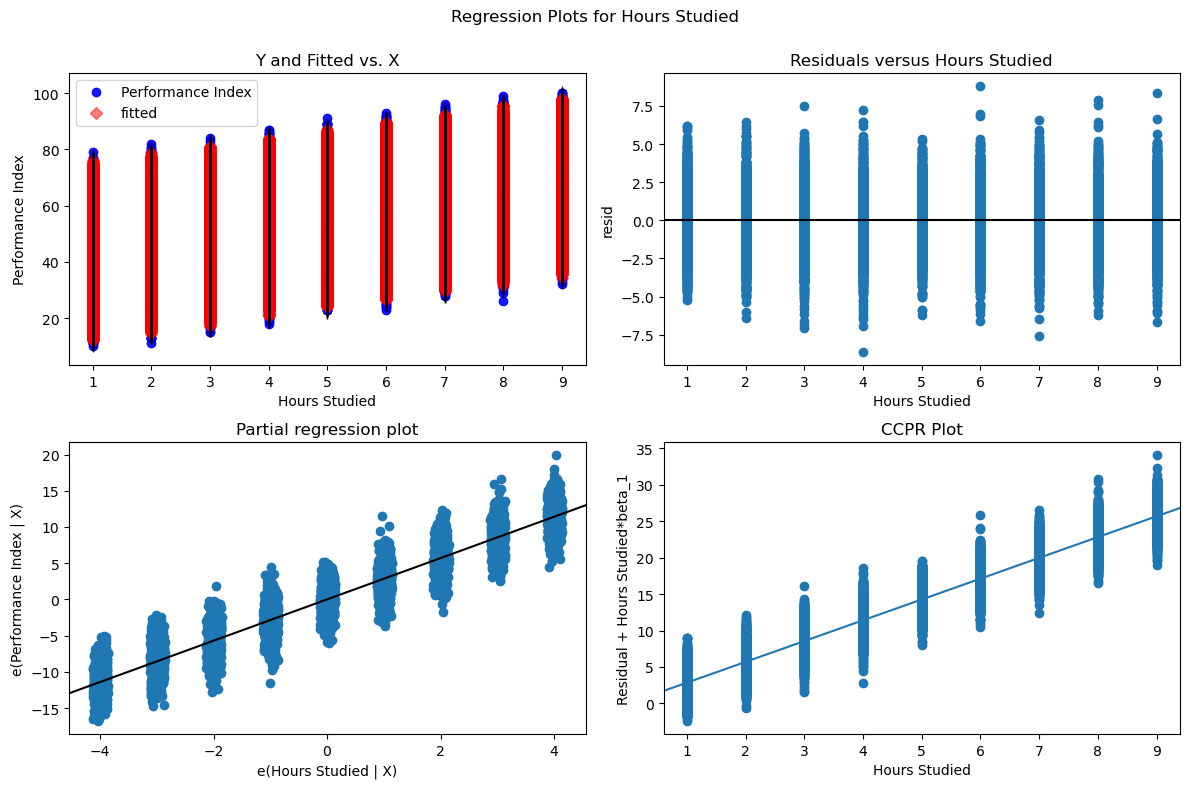

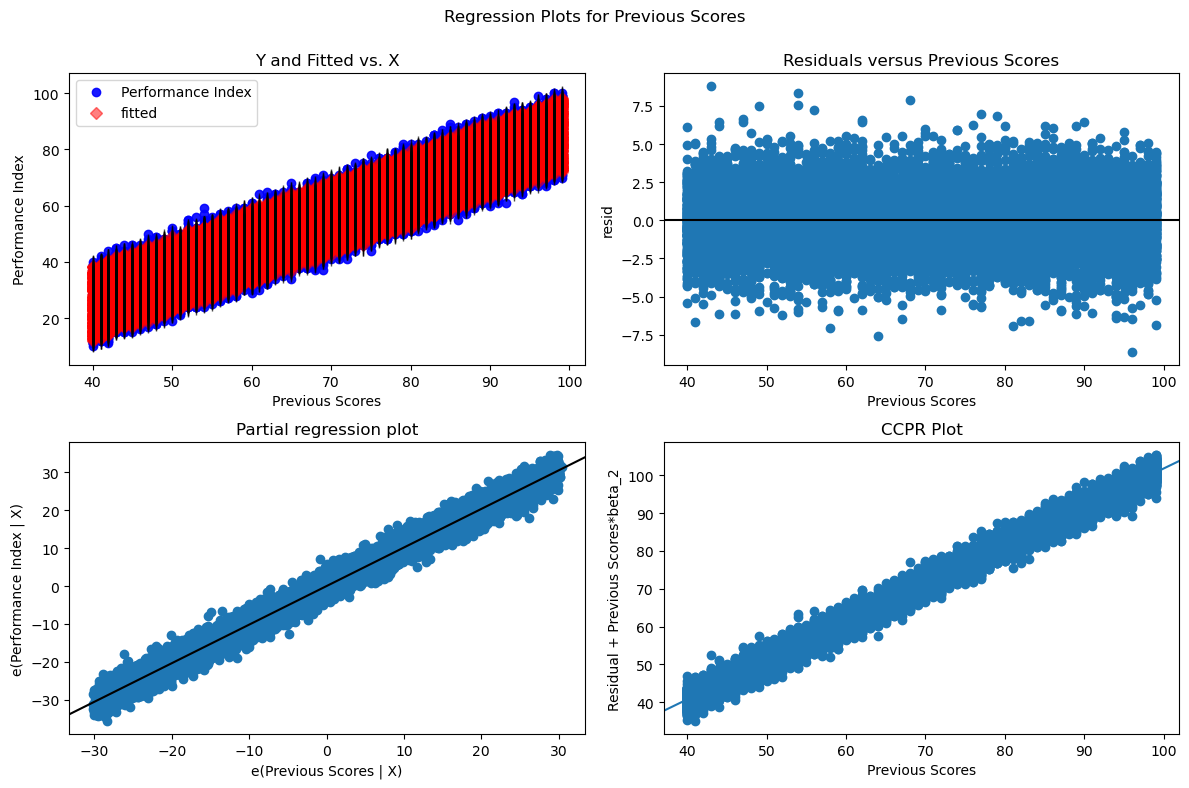

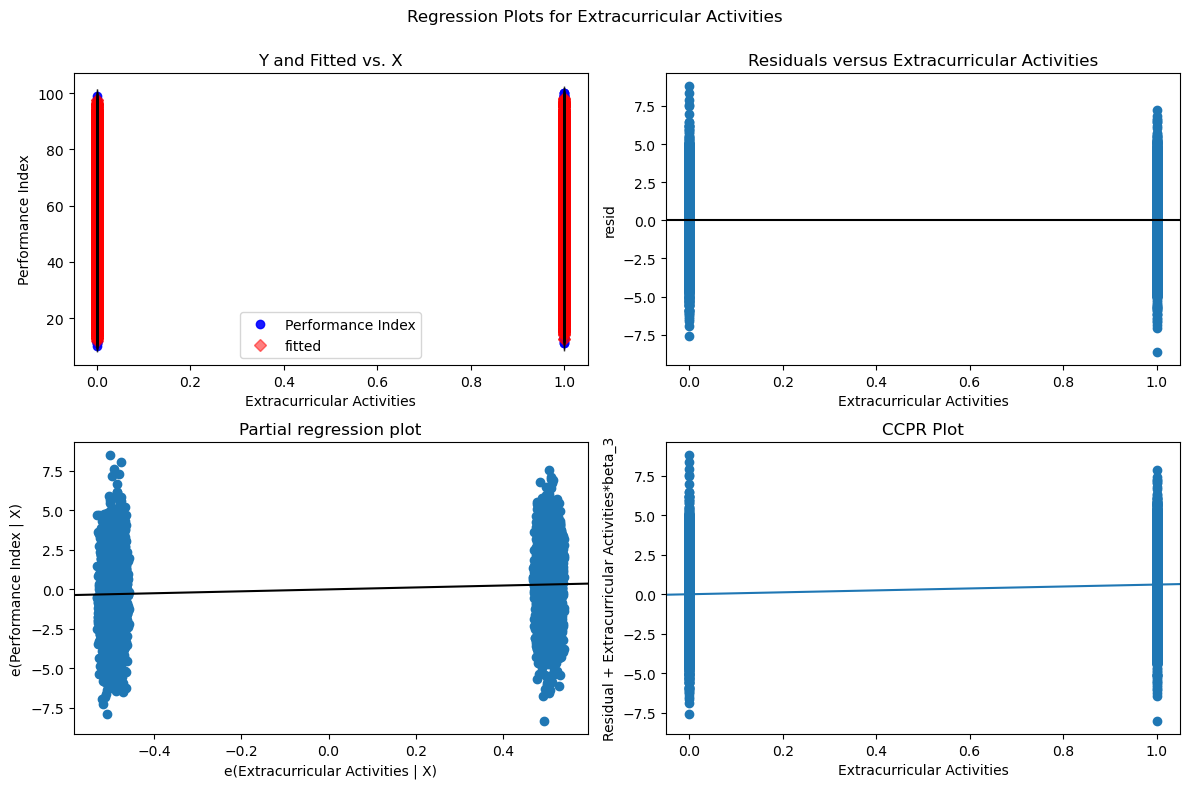

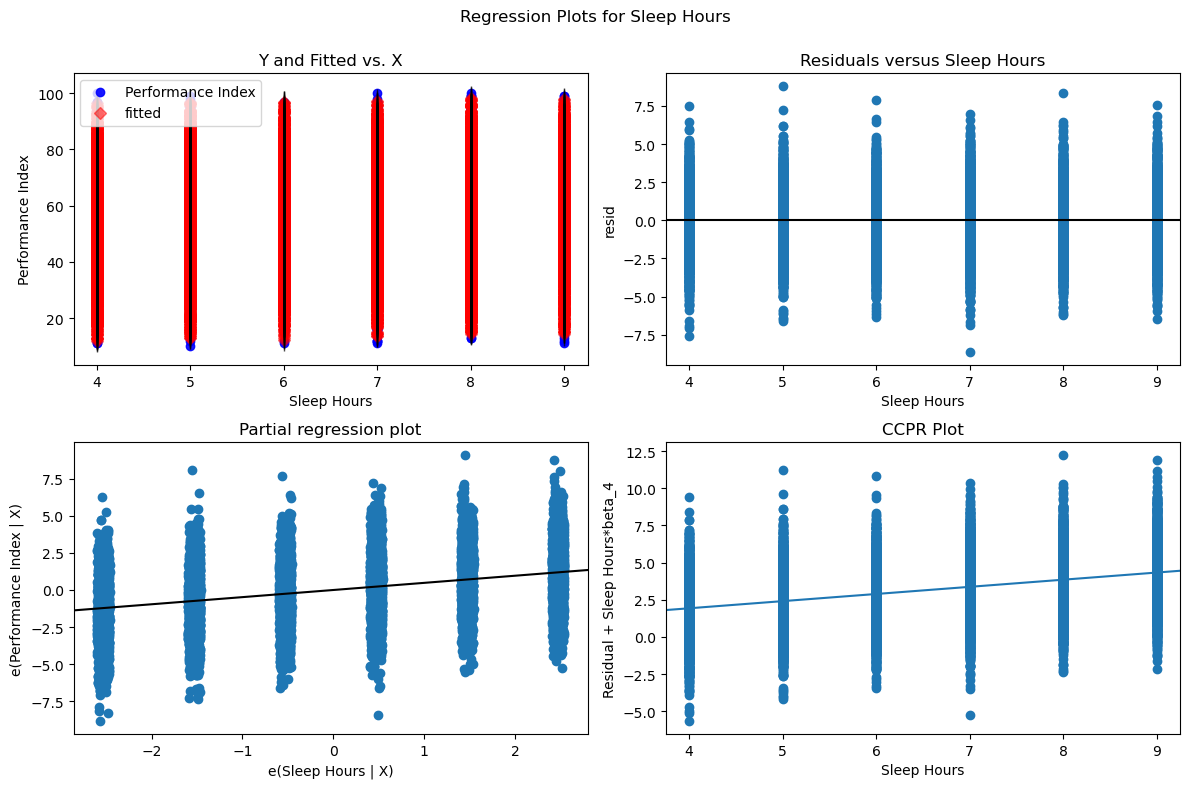

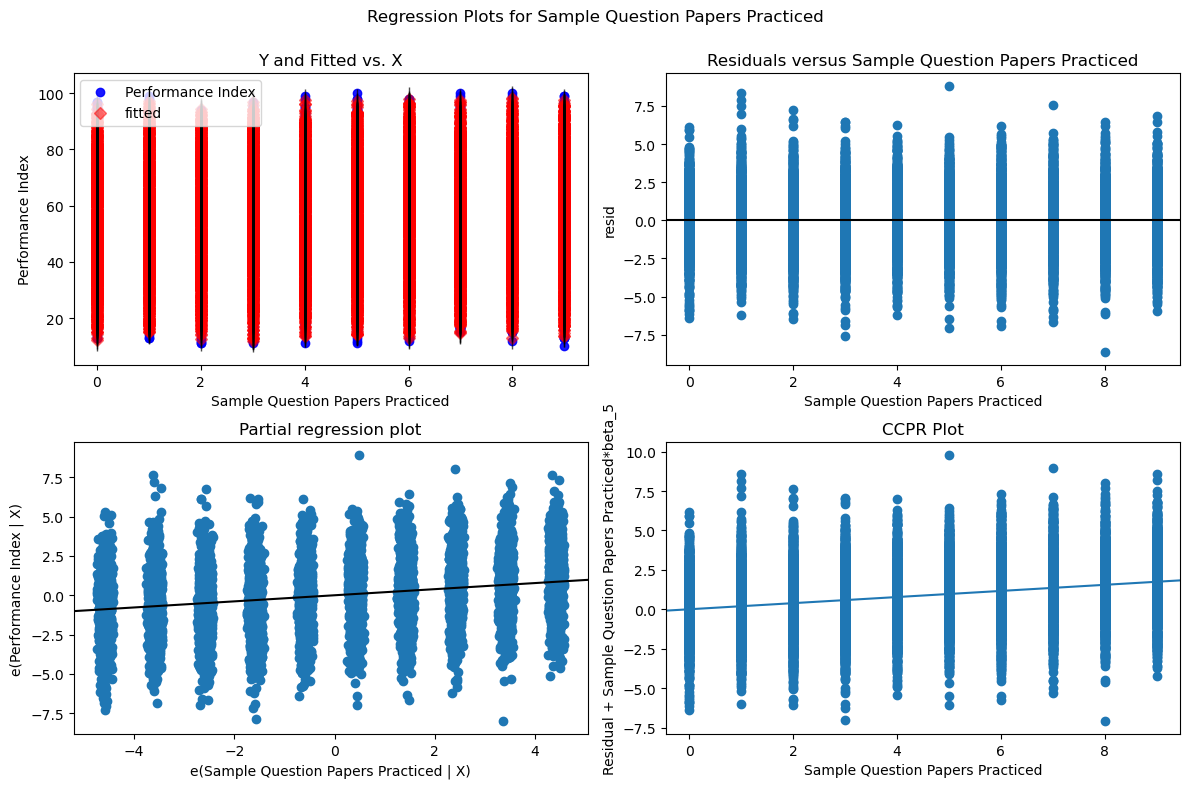

In [200]:
plot_regress_exog(sp_ols_all_result, 'Hours Studied', fig=plt.figure(figsize=(12, 8)))
plot_regress_exog(sp_ols_all_result, 'Previous Scores', fig=plt.figure(figsize=(12, 8)))
plot_regress_exog(sp_ols_all_result, 'Extracurricular Activities', fig=plt.figure(figsize=(12, 8)))
plot_regress_exog(sp_ols_all_result, 'Sleep Hours', fig=plt.figure(figsize=(12, 8)))
plot_regress_exog(sp_ols_all_result, 'Sample Question Papers Practiced', fig=plt.figure(figsize=(12, 8)))

&#9989;  **Question 4.7 (3 points)**: If we could only use one feature to predict Student Performance, which feature would do the best job? 

The feature that would do the best job in predicting Student Performance based on the analysis is `Previous Scores`. This is because it has the highest correlation with the dependent variable (Performance Index) and appears to have a linear relationship with it. The partial regression plot for `Previous Scores` shows a clear linear trend and a tight clustering of points around the fitted line, indicating that it is a strong predictor of the performance index. Also, the residuals for `Previous Scores` appear to be randomly scattered around zero, which suggests that the linear model is appropriate for this variable.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a candy has chocolate or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/data 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/candy-data.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [218]:
import requests

# Put your code here
candy_csv_url = 'https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/candy-data.csv'
response = requests.get(candy_csv_url)
if response.status_code == 200:
    with open('candy-data.csv', 'wb') as f:
        f.write(response.content)

candy_data = pd.read_csv('candy-data.csv')

&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Chocolate` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of all the columns besides `competitorname` and `chocolate`. Display the labels and features to make sure you did this correctly.

In [222]:
# Put your code here.
labels = candy_data['chocolate']
features = candy_data.drop(columns=['chocolate', 'competitorname'])

print(features.head(), type(features))
print("-" * 50)
print(labels.head(), type(labels))

   fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  \
0       0        1               0       0                 1     0    1   
1       0        0               0       1                 0     0    1   
2       0        0               0       0                 0     0    0   
3       0        0               0       0                 0     0    0   
4       1        0               0       0                 0     0    0   

   pluribus  sugarpercent  pricepercent  winpercent  
0         0         0.732         0.860   66.971725  
1         0         0.604         0.511   67.602936  
2         0         0.011         0.116   32.261086  
3         0         0.011         0.511   46.116505  
4         0         0.906         0.511   52.341465   <class 'pandas.core.frame.DataFrame'>
--------------------------------------------------
0    1
1    1
2    0
3    0
4    0
Name: chocolate, dtype: int64 <class 'pandas.core.series.Series'>


&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [225]:
# Put your code here
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=0)
print(f"Train features shape: {train_features.shape}, Test features shape: {test_features.shape}, Train labels shape: {train_labels.shape}, Test labels shape: {test_labels.shape}")

Train features shape: (68, 11), Test features shape: (17, 11), Train labels shape: (68,), Test labels shape: (17,)


&#9989;  **Question 5.3 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [227]:
# Put your code here
logit_model_result = sm.Logit(train_labels, sm.add_constant(train_features)).fit(disp=0)
logit_model_result.summary()

c:\Users\nitish\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              chocolate   No. Observations:                   68
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 Apr 2025   Pseudo R-squ.:                  0.7689
Time:                        19:41:33   Log-Likelihood:                -10.884
converged:                      False   LL-Null:                       -47.105
Covariance Type:            nonrobust   LLR p-value:                 4.186e-11
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.7656      5.411     -1.989      0.047     -21.372      -0.159
fruity              -6.8280      2.455     -2.781      0.005     -11.641      -2.015
caramel             -2.0969      1.657     -1.265      0.206      -5.345       1.151
peanutyalmondy      -4.5264      3.711     -1.220      0.223     -11.800       2.747
nougat             -18.6005   1.33e+04     -0.001      0.999    -2.6e+04     2.6e+04
crispedricewafer     8.1636    461.460      0.018      0.986    -896.282     912.609
hard                 1.5917      1.951      0.816      0.415      -2.232       5.415
bar                 20.5713   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
pluribus            -0.0304      1.450     -0.021      0.983      -2.873       2.812
sugarpercent         2.1903      2.794      0.784      0.433      -3.285       7.666
pricepercent         1.4086      2.708      0.520      0.603      -3.899       6.716
winpercent           0.2382      0.105      2.260      0.024       0.032       0.445
====================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

&#9989;  **Question 5.4 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [233]:
# Put your code here
predicted_probabilities = logit_model_result.predict(sm.add_constant(test_features))
predicted_classes = (predicted_probabilities >= 0.5).astype(int)
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy of the logistic regression model: {accuracy:.4f}")

Accuracy of the logistic regression model: 0.9412


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 6. Setting a project timeline. (5 points)

You will know which project you will be working on as a group on Monday/Tuesday March 24th/25th. You and your group will be presenting this project during the last week of class (April 21st - 25th).  Come up with a project timeline with specific goals/checkpoints to meet as this deadline approaches.  The ability to set project timelines is a very useful skill to have professionally. You can create this timeline yourself, as a group, or you may ask generative ai to try and make a timeline for you. Try to in the very least create weekly checkpoints (~3).

Put your timeline here

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University